In [1]:
import    numpy                   as np
import    pandas                  as pd
import    matplotlib.pyplot       as plt
import    seaborn                 as sns
%matplotlib inline

import    statsmodels.formula.api as sm
from      statsmodels.api         import add_constant
from      sklearn.model_selection import train_test_split
from      sklearn.linear_model    import LogisticRegression

In [2]:
# read the data
data = pd.read_csv('Heart.csv',index_col=0)

In [3]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
data.shape

(303, 14)

In [5]:
# checking for null values
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Ca      4
Thal    2
dtype: int64

***using value_counts in different attributes***

In [6]:
data['Ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [7]:
data['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [8]:
# filling null values in 'Ca' and 'Thal' with the mode of the respective attributes
data['Ca'].fillna(0.0,inplace=True)
data['Thal'].fillna('normal',inplace=True)

In [9]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Series([], dtype: float64)

In [10]:
data['AHD'].value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [11]:
data['Fbs'].value_counts()

0    258
1     45
Name: Fbs, dtype: int64

In [12]:
data['RestECG'].value_counts()

0    151
2    148
1      4
Name: RestECG, dtype: int64

In [13]:
data['ExAng'].value_counts()

0    204
1     99
Name: ExAng, dtype: int64

In [14]:
data['Slope'].value_counts()

1    142
2    140
3     21
Name: Slope, dtype: int64

In [15]:
data['Ca'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
RestBP,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHR,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
Slope,303.0,1.600660,0.616226,1.0,1.0,2.0,2.0,3.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           303 non-null float64
Thal         303 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [18]:
# changing the datatype of categorical columns to category
data['Sex']=data['Sex'].astype('object')
data['Fbs']=data['Fbs'].astype('object')
data['RestECG']=data['RestECG'].astype('object')
data['ExAng']=data['ExAng'].astype('object')
data['Slope']=data['Slope'].astype('object')
data['Ca']=data['Ca'].astype('object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null object
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null object
RestECG      303 non-null object
MaxHR        303 non-null int64
ExAng        303 non-null object
Oldpeak      303 non-null float64
Slope        303 non-null object
Ca           303 non-null object
Thal         303 non-null object
AHD          303 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 35.5+ KB


***The target variable is AHD***


***AHD is a categorical column, so this is a bi-variate classification problem***

In [20]:
# dealing with the target variable
data['AHD']=data['AHD'].replace({'Yes':1,'No':0})

In [21]:
data['AHD'] = data['AHD'].astype('int64')

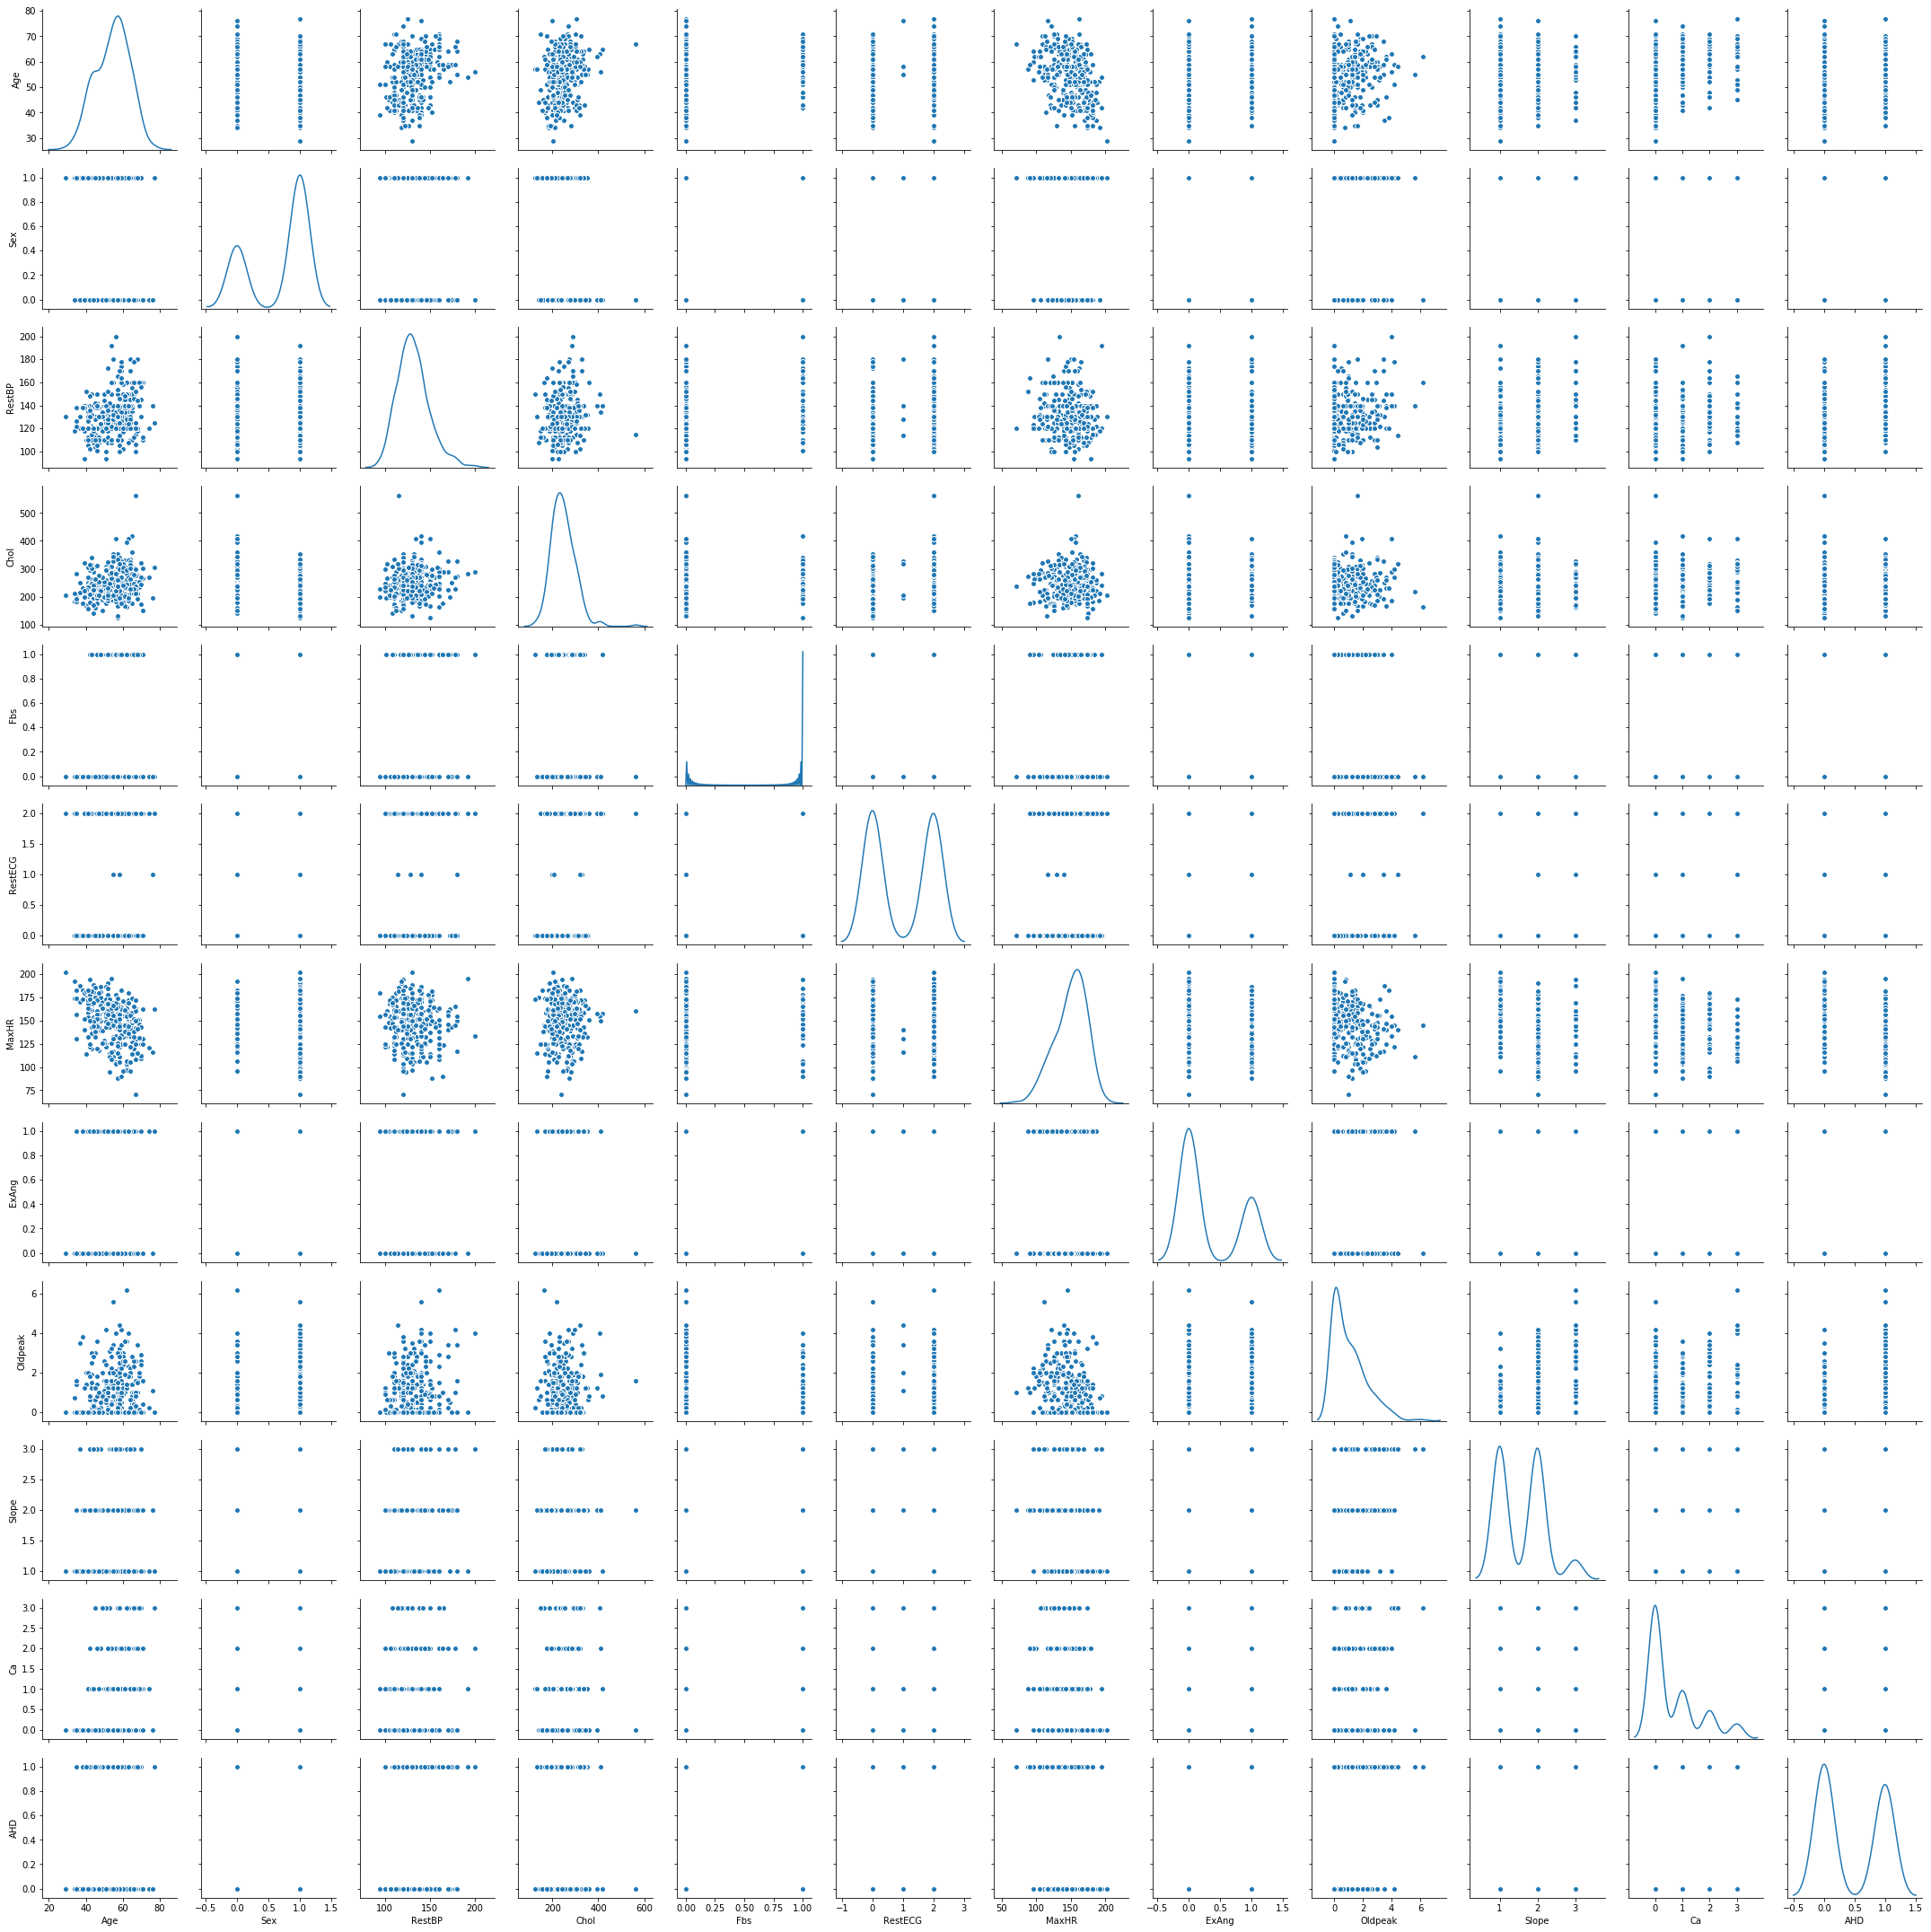

In [22]:
# creating a pairplot
sns.pairplot(data, diag_kind='kde')
plt.show()

In [23]:
# creating dummies for the categorical attributes
data_dummies = pd.get_dummies(data,drop_first=True)

In [24]:
data_dummies.head()

,Age,RestBP,Chol,MaxHR,Oldpeak,AHD,Sex_1,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,...,RestECG_1,RestECG_2,ExAng_1,Slope_2,Slope_3,Ca_1.0,Ca_2.0,Ca_3.0,Thal_normal,Thal_reversable
1,63,145,233,150,2.3,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,67,160,286,108,1.5,1,1,0,0,0,...,0,1,1,1,0,0,0,1,1,0
3,67,120,229,129,2.6,1,1,0,0,0,...,0,1,1,1,0,0,1,0,0,1
4,37,130,250,187,3.5,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
5,41,130,204,172,1.4,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [25]:
data_dummies.shape

(303, 21)

In [26]:
# creating dummies
x = data_dummies.drop(['AHD','RestECG_1','Slope_3','Fbs_1'],axis=1)
y = data_dummies['AHD']

In [27]:
# splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
# creating a logistic regression model
Log_Reg_Model = LogisticRegression()

In [29]:
# training the model
Log_Reg_Model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# predicting
y_pred = Log_Reg_Model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1], dtype=int64)

In [31]:
# confusion matrix
pd.crosstab(y_test,y_pred)

col_0,0,1
AHD,,
0,46,3
1,6,36


In [32]:
TN=46
FN=6
FP=3
TP=36
Total=TN+TP+FN+FP
Accuracy=(TP+TN)/Total
Error=(FP+FN)/Total
Sensitivity=TP/(TP+FN)
Precision=TP/(TP+FP)
Specificity=TN/(TN+FP)
print('Accuracy    : ',Accuracy*100,'%')
print('Error       : ',Error*100,'%')
print('Sensitivity : ',Sensitivity*100,'%')
print('Precision   : ',Precision*100,'%')
print('Specificity : ',Specificity*100,'%')

Accuracy    :  90.10989010989012 %
Error       :  9.89010989010989 %
Sensitivity :  85.71428571428571 %
Precision   :  92.3076923076923 %
Specificity :  93.87755102040816 %


In [33]:
x2=add_constant(x_train)
logit=sm.Logit(y_train,x2)
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.323535
         Iterations 8


In [34]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  212
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                           17
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                  0.5308
Time:                        21:17:32   Log-Likelihood:                -68.589
converged:                       True   LL-Null:                       -146.18
                                        LLR p-value:                 2.354e-24
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.6443      3.111     -0.850      0.395      -8.742       3.453
Age                     -0.0315      0.031     -1.026      0.305      -0.092       0.029
RestBP      

***Q. What could be the target variable?***
    Target variable is AHD.

***Q. Whether this is a classification problem or regression problem?***
    AHD is a categorical column, so this is a bi-variate classification problem.

***Q. Precision (True Positives/(True Positives + False Positives) ***
    Precision          :  92.3076 %

***Q. Recall (True Positives/(True Positives + False Negatives)***
    Recall/Sensitivity :  85.7142 %

In [36]:
from sklearn import metrics

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

0.9010989010989011


In [37]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.88      0.94      0.91        49
          1       0.92      0.86      0.89        42

avg / total       0.90      0.90      0.90        91

